# Linear Regression (with polynomial regression) from Scratch
## Predicting target variable \{ MedHouseVal \}

## Importing all required stuff

In [105]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

## Defining the regression Class

In [106]:
class LinearRegression:
    def __init__(self, degree, learning_rate, iterations):
        self.degree = degree
        self.lr = learning_rate
        self.iterations = iterations
        self.weights = None
        self.bias = None
        self.loss_array = []
        self.X_mean = None
        self.X_std = None

    def addpolyfeatures(self, X):
        poly_features = [X]
        for d in range(2, self.degree + 1):
            poly_features.append(X ** d)
        return np.concatenate(poly_features, axis=1)

    def fit(self, X, y):
        X_poly = self.addpolyfeatures(X)

        self.X_mean = X_poly.mean(axis=0)
        self.X_std = X_poly.std(axis=0)
        X_norm = (X_poly - self.X_mean) / self.X_std

        n_samples, n_features = X_norm.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for J in range(self.iterations):
            y_pred = np.dot(X_norm, self.weights) + self.bias
            error = y_pred - y

            dw = (1 / n_samples) * np.dot(X_norm.T, error)
            db = (1 / n_samples) * np.sum(error)

            self.weights -= self.lr * dw
            self.bias -= self.lr * db

            mse = np.mean(error ** 2)
            self.loss_array.append(mse)

    def predict(self, X):
        X_poly = self.addpolyfeatures(X)
        X_norm = (X_poly - self.X_mean) / self.X_std
        return np.dot(X_norm, self.weights) + self.bias

## Loading the Data, splitting into training and validation sets to tune the parameters

In [107]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

X = train_df.drop(['id', 'MedHouseVal'], axis=1).values
y = train_df['MedHouseVal'].values

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

## Training our model (with 80% of training data)

In [108]:
initial_model = LinearRegression(degree=2, learning_rate=0.5, iterations=10000)
initial_model.fit(X_train, y_train)

## Evaluating performance

In [109]:
train_preds = initial_model.predict(X_train)
val_preds = initial_model.predict(X_val)

train_rmse = np.sqrt(np.mean((train_preds - y_train) ** 2))
val_rmse = np.sqrt(np.mean((val_preds - y_val) ** 2))

print(f"Training RMSE: {train_rmse}")
print(f"Validation RMSE: {val_rmse}")

Training RMSE: 0.6998680189607799
Validation RMSE: 0.7004631426000151


## Loss vs \#iterations plot

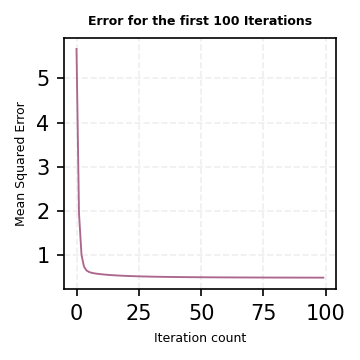

In [112]:
#Plotting only for the first 100 iterations because the graph becomes really sharp and ugly when I make it for the entire iteration loop
plt.figure(figsize=(2.5, 2.5), dpi=150)
plt.plot(initial_model.loss_array[:100], color="#AB678C", linewidth=0.9)
plt.title('Error for the first 100 Iterations', fontsize=6, weight='bold')
plt.xlabel('Iteration count', fontsize=6)
plt.ylabel('Mean Squared Error', fontsize=6)
plt.grid(True, linestyle='--', alpha=0.2)
plt.xticks(np.arange(0, 110, 25))
plt.tight_layout()

## Actual vs Predicted values scatter plot

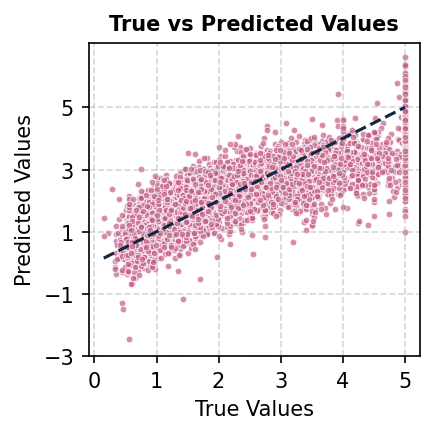

In [114]:
#dont mind me just playing with all parameters to make the plot look as cute as possible
plt.figure(figsize=(3, 3), dpi=150)
plt.scatter(y_val, val_preds, alpha=0.7, s=10, c="#c45d86", edgecolors='white', linewidth=0.5)
plt.plot([min(y_val), max(y_val)], [min(y_val), max(y_val)], color="#122740", linestyle='--', linewidth=1.5) #Drawing line y=x so we can compare and make sure the model doesn't suck 
plt.xlabel('True Values', fontsize=10)
plt.ylabel('Predicted Values', fontsize=10)
plt.title('True vs Predicted Values', fontsize=10, weight='bold')
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(np.arange(0, 6, 1))
plt.yticks(np.arange(-3, 7, 2))
plt.tight_layout()

## Re-Training using the full data

In [115]:
final_model = LinearRegression(degree=2, learning_rate=0.5, iterations=10000)
final_model.fit(X, y)

## Evaluating test data

In [116]:
X_test = test_df.drop('id', axis=1).values
test_preds = final_model.predict(X_test)

submission = pd.DataFrame({
    'id': test_df['id'],
    'MedHouseVal': test_preds
})
submission.to_csv('submission.csv', index=False)